In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits

#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = load_digits() #load the dataset in digits
digits.data.shape

(1797, 64)

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.data[0:3]  #flattened data for 3 images of the dataset


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [6]:
k_means = KMeans(n_clusters=10,random_state=0)
clusters = k_means.fit_predict(digits.data) #run KMeans clustering on digits.data for 1797 records and 64 features
k_means.cluster_centers_.shape

(10, 64)

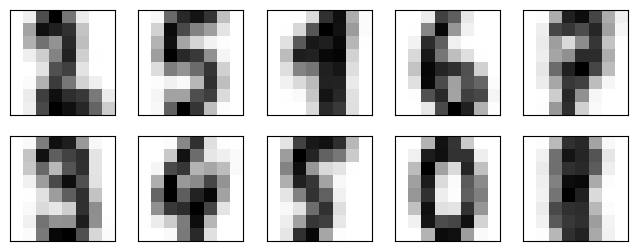

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = k_means.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8 matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image & plotting relevant centers
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary) #imshow(matplotlib method) to render the image in notebook

In [8]:
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
    mask = (clusters == i)
    #if a specific digit belongs to/equivalent a specific cluster then its True else False
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False  True  True ...  True False False]


In [9]:
#if a specific digit belongs to/equivalent a specific cluster then acuracy is 1 else 0
accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 74.40%


Text(113.9222222222222, 0.5, 'Predicted Label')

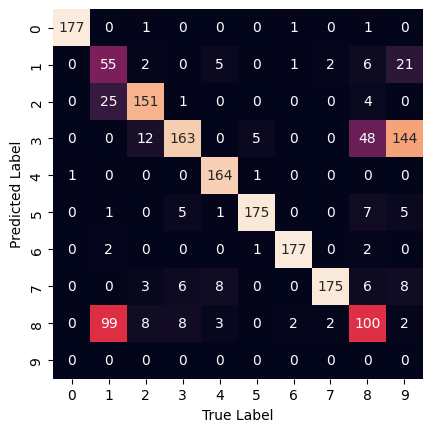

In [10]:
matrix = confusion_matrix(digits.target, labels)
sns.heatmap(matrix.T, square = True, annot = True,
           fmt = 'd', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")